<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/curse_of_dimensionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pharringtonp19/business-analytics.git

fatal: destination path 'business-analytics' already exists and is not an empty directory.


### **Import Packages**

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import jax.numpy as jnp
import jax
import seaborn as sb
from functools import partial

### **Read In Data Set**

In [3]:
df = pd.read_csv('/content/business-analytics/datasets/CASchools.csv')
df['Students_per_Teacher'] = df['students'] / df['teachers']
df.head()

,Unnamed: 0,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,Students_per_Teacher
0,1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,17.889909
1,2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,21.524664
2,3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,18.697225
3,4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,17.357143
4,5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,18.671329


### **Functions**

In [5]:
def closest_distance(matrix, i):
    # Calculate the difference between each row in the matrix and the target row (excluding itself)
    differences = matrix - matrix[i]

    # Compute the Euclidean distance for each row
    distances = jnp.linalg.norm(differences, axis=1)

    # Set the distance of the selected row to infinity to exclude it
    distances = distances.at[i].set(jnp.inf)

    # Find the minimum distance
    min_distance = jnp.min(distances)

    return min_distance

def avg_closest_distance(matrix):
  ids = jnp.arange(0, matrix.shape[0])
  distance = jax.vmap(partial(closest_distance, matrix))(ids)
  return jnp.mean(distance)

### **For-loop**

In [19]:
continuous_df = df.loc[:, 'students':'math']
continuous_df = (continuous_df - continuous_df.mean()) / continuous_df.std()
results = []
for column in continuous_df.columns:
  print(column)
  matrix = jnp.array(continuous_df.loc[:, 'students':column].values)
  ans = avg_closest_distance(matrix)
  results.append(ans)

students
teachers
calworks
lunch
computer
expenditure
income
english
read
math


### **Plot**

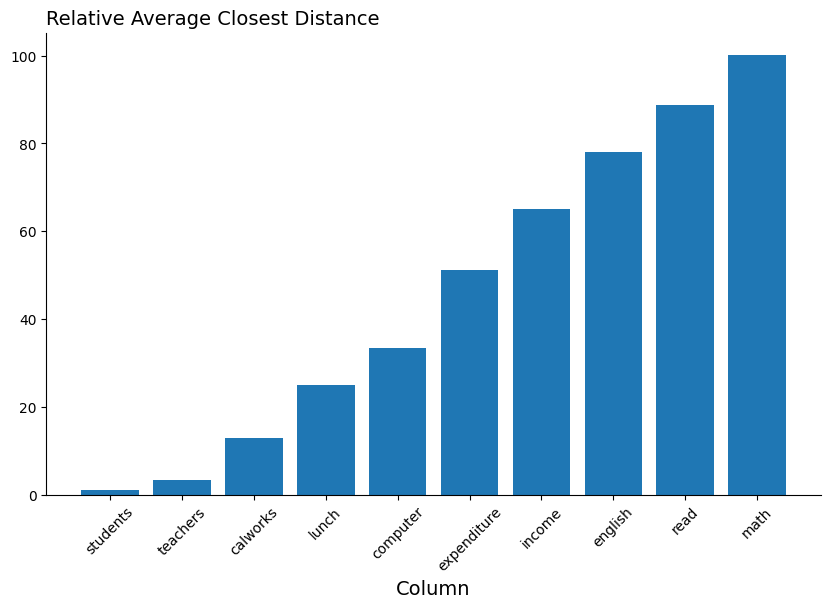

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(continuous_df.columns, np.array(results)/results[0])
plt.xlabel('Column', size=14)
plt.title('Relative Average Closest Distance', loc='left', size=14)
plt.xticks(rotation=45)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()